# Market Basket Analysis - Online Retail

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('online_retail_2010.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


In [20]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50,18.00,12680.0,France


In [11]:
df.shape

(541910, 8)

In [6]:
#check missing values
df.isnull().sum().sort_values(ascending = False)

Customer ID    135080
Description      1454
Country             0
Price               0
InvoiceDate         0
Quantity            0
StockCode           0
Invoice             0
dtype: int64

In [7]:
df.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [18]:
print("Count of unique invoice numbers: {cnt}" \
      .format(cnt=df.Invoice.nunique()))

Count of unique invoice numbers: 25900


In [19]:
print("Count of unique customer ids: {cnt}" \
      .format(cnt=df['Customer ID'].nunique()))

Count of unique customer ids: 4372


Market basket analysis looks to identify associations between the items purchased by all customers over time

### Data Cleaning

In [ ]:
the main focus of data cleaning involves removing transactions with a non-positive number of items

In [24]:
# create new column called IsC
# looking for C in InvoiceNo column
df['IsC'] = (df['Invoice'].astype(str).apply(lambda x: 1 if x.find('C') \
                                != -1 else 0))

In [25]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,IsC
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom,0


In [26]:
df['IsC'].unique()

array([0, 1])

In [ ]:
# Filter out all transactions having either zero or a negative number of items and remove Invoice starting with C

In [27]:
df_clean = (
    df
    .loc[df["Quantity"] > 0]
    .loc[df['IsC'] != 1]
    .loc[:, ["Invoice", "Description"]]
    .dropna()
)

In [28]:
df_clean.head(10)

,Invoice,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536368,JAM MAKING SET WITH JARS


In [30]:
print("Data dimension: {dim}".format(dim=df_clean.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=df_clean.Invoice.nunique()))

Data dimension: (530694, 2)
Count of unique invoice numbers: 20136


In [ ]:
# Remove duplicate of invoice numbers

In [34]:
invoice_no_dup = df_clean.Invoice.tolist()
invoice_no_dup = list(set(invoice_no_dup))
print("Length of list of invoice numbers: {ln}" \
      .format(ln=len(invoice_no_dup)))

Length of list of invoice numbers: 20136


In [ ]:
# cut it to only include the first 10,000 elements

In [35]:
subset_invoice_no_dup = invoice_no_dup[0:10000]
print("Length of subset list of invoice numbers: {ln}"\
      .format(ln=len(subset_invoice_no_dup)))

Length of subset list of invoice numbers: 10000


In [36]:
# filter data set down to based on
# subset of invoice number list
df_clean = df_clean.loc[df_clean["Invoice"].isin(subset_invoice_no_dup)]

In [37]:
df_clean.shape

(260347, 2)

In [38]:
print("Data dimension: {dim}"\
      .format(dim=df_clean.shape))
print("Count of unique invoice numbers: {cnt}"\
      .format(cnt=df_clean.Invoice.nunique()))

Data dimension: (260347, 2)
Count of unique invoice numbers: 10000


In [ ]:
#Transform the data in df_clean into the aforementioned list of lists called invoice_item_list

In [39]:
invoice_item_list = []
for num in list(set(df_clean.Invoice.tolist())):
    # filter data set down to one invoice number
    tmp_df = df_clean.loc[df_clean['Invoice'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)
    
print(invoice_item_list[1:5])

[['BLACK RECORD COVER FRAME', 'RED DINER WALL CLOCK', 'LUNCH BAG SUKI DESIGN ', 'LUNCH BAG PINK POLKADOT', 'LUNCH BAG SPACEBOY DESIGN ', 'LUNCH BAG CARS BLUE', 'LUNCH BAG  BLACK SKULL.', 'LUNCH BAG VINTAGE LEAF DESIGN', 'LUNCH BAG DOILEY PATTERN ', 'FUNKY WASHING UP GLOVES ASSORTED'], ['POSTAGE'], ['I LOVE LONDON BABY GIFT SET', 'RETRO PLASTIC ELEPHANT TRAY', 'AIRLINE LOUNGE,METAL SIGN', 'UNION JACK FLAG LUGGAGE TAG', 'FOOD COVER WITH BEADS SET 2 ', 'SET OF 4 NAPKIN CHARMS CUTLERY', 'LONDON BUS COFFEE MUG', 'CARD I LOVE LONDON ', 'REGENCY SUGAR BOWL GREEN', 'BLUE GIANT GARDEN THERMOMETER', 'PACK OF 60 PINK PAISLEY CAKE CASES', 'JAM MAKING SET WITH JARS', 'WOODEN ROUNDERS GARDEN SET ', 'BLACK LOVE BIRD T-LIGHT HOLDER', '72 SWEETHEART FAIRY CAKE CASES', 'PACK OF 60 DINOSAUR CAKE CASES', 'BROCADE RING PURSE ', 'JAM MAKING SET PRINTED', 'TOP SECRET PEN SET', '12 PENCILS SMALL TUBE RED RETROSPOT', '60 TEATIME FAIRY CAKE CASES', 'CHINESE DRAGON PAPER LANTERNS', 'PACK OF 72 SKULL CAKE CASES',

Data is filtered and subset to only the needed columns and the relevant rows and then cut the full dataset down to the first 10,000 unique invoice numbers. The last step converted the DataFrame to a list of lists.

## Data Encoding

In [46]:
import mlxtend.frequent_patterns
import mlxtend.preprocessing

In [47]:
df_encoder = mlxtend.preprocessing.TransactionEncoder()
df_encoder_array = df_encoder.fit_transform(invoice_item_list)
print(df_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [49]:
df_encoder_df = pd.DataFrame(
    df_encoder_array, 
    columns=df_encoder.columns_
)

# this is a very big table, so for more 
# easy viewing only a subset is printed
df_encoder_df.loc[
    6980:6989, 
    df_encoder_df.columns.tolist()[0:8]
]

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE
6980,False,False,False,False,False,False,False,False
6981,False,False,False,False,False,False,False,False
6982,False,False,False,False,False,False,False,False
6983,False,False,False,False,False,False,False,False
6984,False,False,False,False,False,False,False,False
6985,False,False,False,False,False,False,False,False
6986,False,False,False,False,False,False,False,False
6987,False,False,False,False,False,False,False,False
6988,False,False,False,False,False,False,False,False
6989,False,False,False,False,False,False,False,False


The Apriori principle: any subset of a frequent item set must itself be frequent.

In [50]:
print("Data dimension (row count, col count): {dim}".format(dim=df_encoder_df.shape))

Data dimension (row count, col count): (10000, 3916)


#### The Apriori Algorithm 

The Apriori algorithm is a data mining methodology for identifying and quantifying frequent item sets in transaction data and is the foundational component of association rule learning.

In [52]:
mod_minsupport = mlxtend.frequent_patterns.apriori(
    df_encoder_df,
    min_support=0.01
)
mod_minsupport.loc[0:10]

,support,itemsets
0,0.0139,(8)
1,0.0164,(13)
2,0.0120,(19)
3,0.0167,(20)
4,0.0179,(21)
5,0.0169,(22)
6,0.0132,(24)
7,0.0116,(25)
8,0.0132,(26)
9,0.0138,(31)


This minimum support value is the same as saying that when analyzing 10,000 transactions, we need an item set to appear 100 times to be considered frequent.

In [53]:
# add colnames for easier interpretability

mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    df_encoder_df, 
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:10]

,support,itemsets
0,0.0139,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.0164,(10 COLOUR SPACEBOY PEN)
2,0.0120,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.0167,(12 PENCIL SMALL TUBE WOODLAND)
4,0.0179,(12 PENCILS SMALL TUBE RED RETROSPOT)
5,0.0169,(12 PENCILS SMALL TUBE SKULL)
6,0.0132,(12 PENCILS TALL TUBE RED RETROSPOT)
7,0.0116,(12 PENCILS TALL TUBE SKULLS)
8,0.0132,(12 PENCILS TALL TUBE WOODLAND)
9,0.0138,(15CM CHRISTMAS GLASS BALL 20 LIGHTS)


These item sets occur with sufficient frequency to potentially be meaningful and actionable.

In [54]:
# add how many items are in the set
mod_colnames_minsupport['length'] = \
(mod_colnames_minsupport['itemsets'].apply(lambda x: len(x)))
mod_colnames_minsupport.loc[0:10]

,support,itemsets,length
0,0.0139,( SET 2 TEA TOWELS I LOVE LONDON ),1
1,0.0164,(10 COLOUR SPACEBOY PEN),1
2,0.0120,(12 MESSAGE CARDS WITH ENVELOPES),1
3,0.0167,(12 PENCIL SMALL TUBE WOODLAND),1
4,0.0179,(12 PENCILS SMALL TUBE RED RETROSPOT),1
5,0.0169,(12 PENCILS SMALL TUBE SKULL),1
6,0.0132,(12 PENCILS TALL TUBE RED RETROSPOT),1
7,0.0116,(12 PENCILS TALL TUBE SKULLS),1
8,0.0132,(12 PENCILS TALL TUBE WOODLAND),1
9,0.0138,(15CM CHRISTMAS GLASS BALL 20 LIGHTS),1


In [ ]:
# filtered down to a single item set

In [55]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'15CM CHRISTMAS GLASS BALL 20 LIGHTS'}
    )
]

,support,itemsets,length
9,0.0138,(15CM CHRISTMAS GLASS BALL 20 LIGHTS),1


The support value says that this specific item set appears in 1.38% of the transactions.

In [ ]:
# Return all item sets of length 2 whose support is in the range [0.03, 0.031]

In [61]:
mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) & 
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
]

,support,itemsets,length
869,0.0203,"(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...",2
907,0.0202,"(STRAWBERRY CHARLOTTE BAG, CHARLOTTE BAG SUKI ...",2
1089,0.0204,"(JUMBO BAG ALPHABET, JUMBO BAG APPLES)",2
1093,0.0208,"(JUMBO BAG ALPHABET, JUMBO BAG RED RETROSPOT)",2
1171,0.0206,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",2
1207,0.0205,"(RED RETROSPOT CHARLOTTE BAG, JUMBO BAG RED RE...",2
1329,0.0204,"(LUNCH BAG APPLE DESIGN, LUNCH BAG SPACEBOY DE...",2
1360,0.0207,"(LUNCH BAG PINK POLKADOT, LUNCH BAG SUKI DESIGN )",2
1363,0.0204,"(LUNCH BAG PINK POLKADOT, LUNCH BAG WOODLAND)",2
1402,0.0204,"(LUNCH BAG WOODLAND, LUNCH BAG SUKI DESIGN )",2


Each of these item sets appears in between 2.0% and 2.1% of transactions.

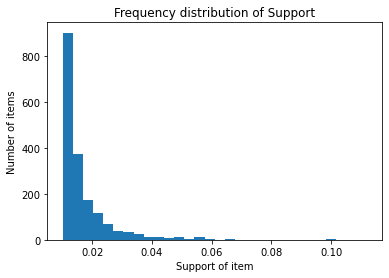

In [62]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.xlabel("Support of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Support")
plt.show()

#### Association Rules

Association rule learning is a machine learning model that seeks to unearth the hidden patterns (in other words, relationships) in transaction data that describe the shopping habits of the customers of any retailer. 

In [63]:
rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="confidence",
    min_threshold=0.6, 
    support_only=False
)

rules.loc[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0210,0.0461,0.0136,0.647619,14.048136,0.012632,2.707014
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0210,0.0506,0.0140,0.666667,13.175231,0.012937,2.848200
2,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.0270,0.0461,0.0164,0.607407,13.175866,0.015155,2.429745
3,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.0213,0.0461,0.0133,0.624413,13.544754,0.012318,2.539759
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0461,0.0506,0.0315,0.683297,13.503897,0.029167,2.997763
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.0506,0.0461,0.0315,0.622530,13.503897,0.029167,2.527086
6,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE RED ),0.0270,0.0506,0.0185,0.685185,13.541209,0.017134,3.015741
7,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED ),0.0213,0.0506,0.0141,0.661972,13.082447,0.013022,2.808642
8,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.0363,0.0506,0.0222,0.611570,12.086369,0.020363,2.444200
9,(PAINTED METAL PEARS ASSORTED),(ASSORTED COLOUR BIRD ORNAMENT),0.0188,0.0728,0.0133,0.707447,9.717676,0.011931,3.169338


In [64]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 471


In [65]:
rules2 = mlxtend.frequent_patterns\
         .association_rules(mod_colnames_minsupport, \
         metric="lift", \
         min_threshold=50,\
         support_only=False)
rules2.loc[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HERB MARKER BASIL),(HERB MARKER MINT),0.0118,0.0119,0.0102,0.864407,72.639225,0.010060,7.287238
1,(HERB MARKER MINT),(HERB MARKER BASIL),0.0119,0.0118,0.0102,0.857143,72.639225,0.010060,6.917400
2,(HERB MARKER PARSLEY),(HERB MARKER BASIL),0.0115,0.0118,0.0102,0.886957,75.165807,0.010064,8.741769
3,(HERB MARKER BASIL),(HERB MARKER PARSLEY),0.0118,0.0115,0.0102,0.864407,75.165807,0.010064,7.290188
4,(HERB MARKER ROSEMARY),(HERB MARKER BASIL),0.0116,0.0118,0.0104,0.896552,75.978960,0.010263,9.552600
5,(HERB MARKER BASIL),(HERB MARKER ROSEMARY),0.0118,0.0116,0.0104,0.881356,75.978960,0.010263,8.330800
6,(HERB MARKER BASIL),(HERB MARKER THYME),0.0118,0.0112,0.0103,0.872881,77.935835,0.010168,7.778560
7,(HERB MARKER THYME),(HERB MARKER BASIL),0.0112,0.0118,0.0103,0.919643,77.935835,0.010168,12.297600
8,(HERB MARKER PARSLEY),(HERB MARKER MINT),0.0115,0.0119,0.0104,0.904348,75.995616,0.010263,10.330136
9,(HERB MARKER MINT),(HERB MARKER PARSLEY),0.0119,0.0115,0.0104,0.873950,75.995616,0.010263,7.842100


In [66]:
print("Number of Associations: {}".format(rules2.shape[0]))

Number of Associations: 24


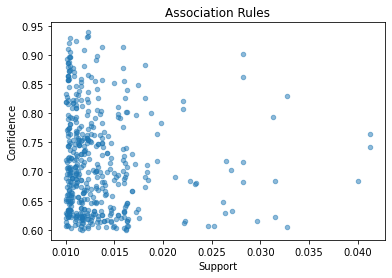

In [69]:
rules.plot.scatter("support", "confidence", \
                   alpha=0.5, marker="o")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

If an item set has high support, the items are likely to appear with many other items, and the chances of high confidence very low.

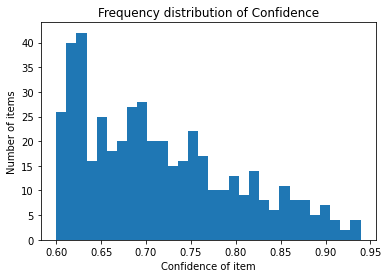

In [70]:
rules.hist("confidence", grid=False, bins=30)
plt.xlabel("Confidence of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Confidence")
plt.show()

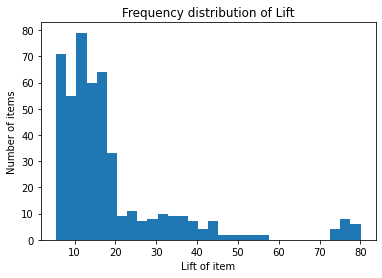

In [71]:
rules.hist("lift", grid=False, bins=30)
plt.xlabel("Lift of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Lift")
plt.show() 

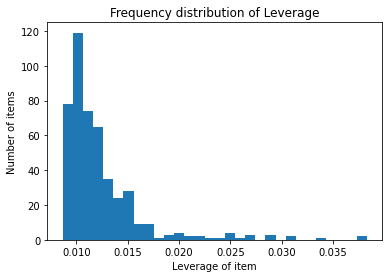

In [72]:
rules.hist("leverage", grid=False, bins=30)
plt.xlabel("Leverage of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Leverage")
plt.show() 

Market basket analysis is used to analyze and extract insights from transaction. Association rule learning is a machine learning approach to uncovering the associations between the products individuals purchase that are strong enough to be leveraged for business decisions. The Apriori algorithm and association rule learning models using mlxtend and know how these models are applied in business. 